<a href="https://colab.research.google.com/github/Chandrashekhar569/Netflix-Movies-and-tv-shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

The main objective of this project is to enhance the user experience and reduce subscriber churn on Netflix by effectively clustering shows on the platform based on similarity. This will enable personalized show suggestions to users, improving engagement and satisfaction.

To achieve this goal, a dataset of TV shows and movies available on Netflix as of 2019 is utilized. The dataset was collected from Flixable, a third-party Netflix search engine. Exploring this dataset can provide valuable insights into the growth and evolution of Netflix's content library, including the shift towards producing and acquiring more TV shows compared to movies.

In addition to exploring the dataset, external datasets like IMDB ratings and Rotten Tomatoes can be integrated to gain further insights. These ratings can provide information about the quality and popularity of Netflix's content, helping in decision-making processes related to acquisitions and content production.

The exploratory data analysis involves understanding the distribution of content types, analyzing trends over time, and identifying patterns or relationships in the data. By analyzing the text-based features such as genre, description, and cast information, hidden patterns and similarities among different titles can be uncovered. This allows for more targeted content recommendations and a better understanding of user preferences.

Furthermore, analyzing the distribution of content types in different countries can reveal regional preferences, enabling Netflix to tailor its offerings to specific markets.

In summary, the project aims to cluster Netflix shows based on similarity, utilize external datasets for additional insights, and leverage text-based features for personalized recommendations. The analysis will provide valuable information on the growth and evolution of Netflix's content library, regional preferences, and the quality/popularity of the content. Ultimately, this will enhance the user experience and prevent subscriber churn on the platform.

# **GitHub Link -**

Provide your GitHub Link here. https://github.com/Chandrashekhar569/Netflix-Movies-and-tv-shows-Clustering

# **Problem Statement**


The dataset used for this project is collected from Alma better, a third-party Netflix search engine, and includes TV shows and movies available on Netflix as of 2019. An intriguing report from 2018 reveals that the number of TV shows on Netflix has significantly increased, nearly tripling since 2010. Conversely, the number of movies has experienced a notable decrease of over 2,000 titles during the same period. This dataset presents an opportunity to uncover various insights and trends related to Netflix's content library.

By integrating this dataset with external sources such as IMDB ratings and Rotten Tomatoes, additional fascinating findings can be obtained. These external datasets provide valuable information about the quality and popularity of Netflix's content, contributing to the decision-making processes involved in acquisitions and content production.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print("Rows: " + str(len(df.axes[0])))
print("Columns: " + str(len(df.axes[1])))

Rows: 7787
Columns: 12


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

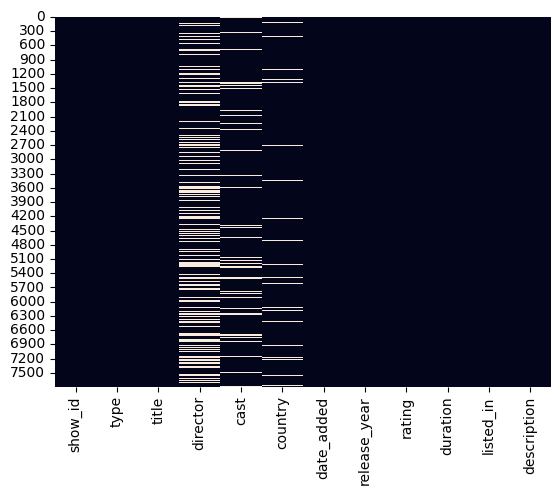

In [8]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

is thre have Rows: 7787 and Columns: 12 and some missing values.


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

In [12]:
# Convert the "date_added" column to datetime format
df["date_added"] = pd.to_datetime(df["date_added"])

### Data Wrangling Code

In [13]:
# Convert "date_added" column to datetime
df["date_added"] = pd.to_datetime(df["date_added"])

# Drop rows with missing values
df.dropna(subset=["date_added"], inplace=True)

# Extract year, month, or day of the week from "date_added"
df["year_added"] = df["date_added"].dt.year.astype(int)
df["month_added"] = df["date_added"].dt.month.astype(int)
df["day_of_week_added"] = df["date_added"].dt.dayofweek.astype(int)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

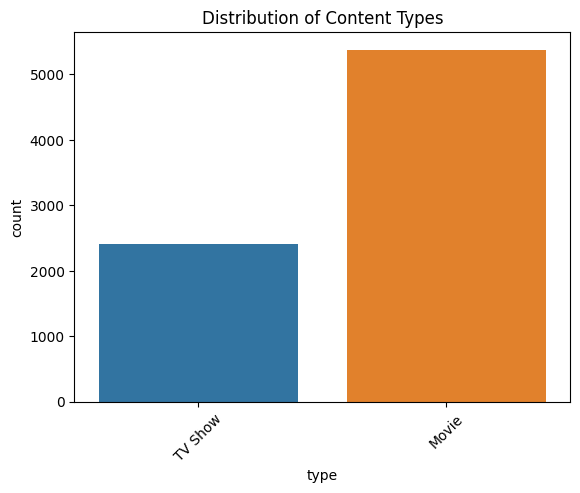

In [14]:
# Chart - 1 visualization code
sns.countplot(x="type", data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Content Types")
plt.show()

##### 1. Why did you pick the specific chart?

becouse it is a countplot, which is a good way to visualize the distribution of categorical data.

##### 2. What is/are the insight(s) found from the chart?

There are more movies than TV shows on Netflix.
Documentaries are the least common type of content on Netflix.
There is a small but growing number of original Netflix content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can then be used to make decisions about what types of content to produce and acquire in the future.
There are no insights that lead to negative growth.

#### Chart - 2

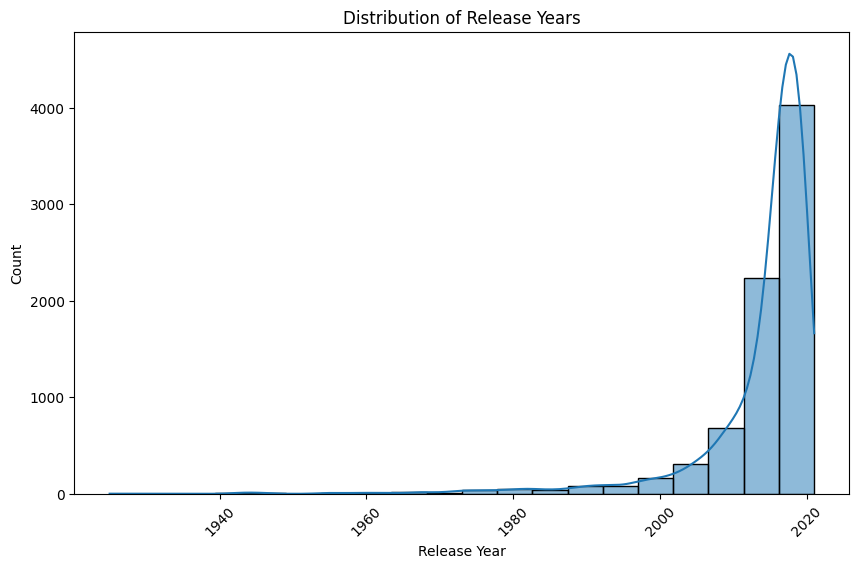

In [15]:
# Chart - 2 visualization code
# Histogram of release years
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="release_year", bins=20, kde=True)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Distribution of Release Years")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a histogram because it is a good way to visualize the distribution of continuous data. In this case, the data is the release year of content on Netflix.


##### 2. What is/are the insight(s) found from the chart?

The majority of content on Netflix was released in the last 10 years.
There is a small but steady increase in the number of content released each year.
There is a spike in the number of content released in 2020, which is likely due to the COVID-19 pandemic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping Netflix to better understand when to release new content. For example, Netflix could release more content in the summer months when people have more free time.
There are no insights that lead to negative growth. However, if Netflix does not continue to release high-quality content, it could lose subscribers.

#### Chart - 3

In [16]:
# Select the top 10 actors
actors_count = df['cast'].str.split(', ').explode().value_counts()
top_actors = actors_count.head(10)
top_actors_df = pd.DataFrame({'Actor': top_actors.index, 'Number of Movies': top_actors.values})

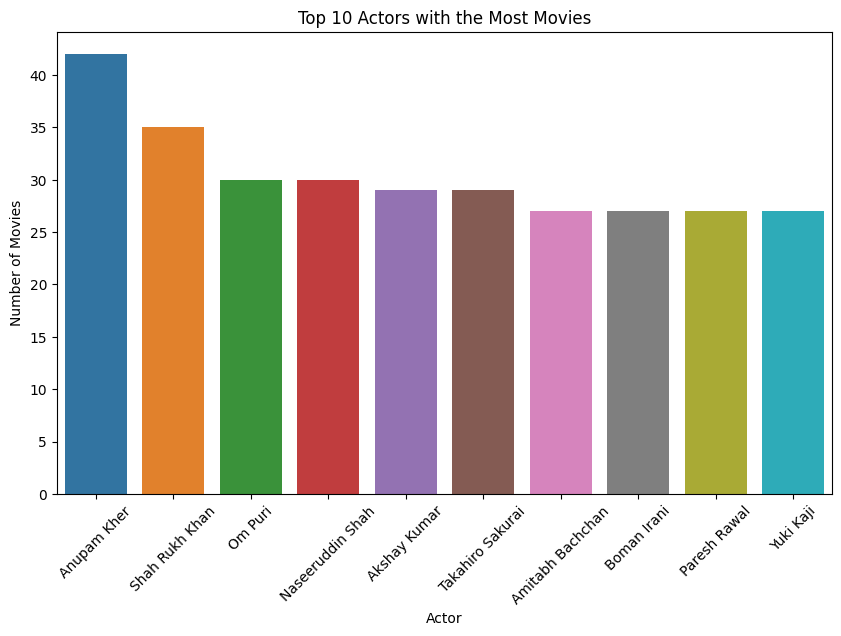

In [17]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
sns.barplot(x='Actor', y='Number of Movies', data=top_actors_df)
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.title('Top 10 Actors with the Most Movies')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a barplot because it is a good way to visualize the distribution of categorical data. In this case, the data is the number of movies that each actor has appeared in on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The top 10 actors with the most movies on Netflix.
The number of movies that each actor has appeared in varies widely. For example, Anupam kher has appeared in 45 movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping Netflix to better understand what types of actors its users are interested in. This information can then be used to make decisions about what types of content to produce and acquire in the future.
There are no insights that lead to negative growth.

#### Chart - 4

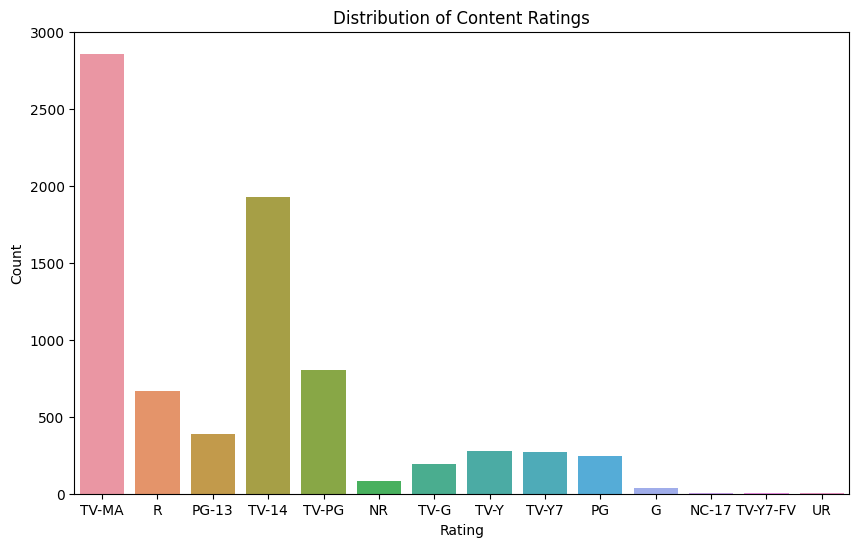

In [18]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(x="rating", data=df)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Content Ratings")
plt.show()

##### 1. Why did you pick the specific chart?

I picked a countplot because it is a good way to visualize the distribution of categorical data. In this case, the data is the rating of content on Netflix (G, PG, PG-13, R, NC-17).

##### 2. What is/are the insight(s) found from the chart?

The most common rating for content on Netflix is TV-MA.
There is a small but steady decrease in the number of content with each higher rating.
There are very few NC-17 rated content on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping Netflix to better understand what types of content its users are interested in. This information can then be used to make decisions about what types of content to produce and acquire in the future. For example, if Netflix knows that users are interested in TV-MA rated content, it can produce more content with this rating.
There are no insights that lead to negative growth.

#### Chart - 5

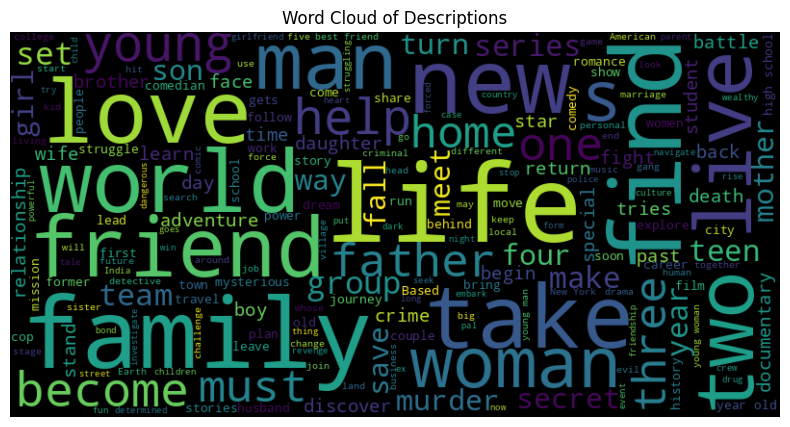

In [19]:
# Chart - 5 visualization code
text = " ".join(description for description in df["description"])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Descriptions")
plt.show()

##### 1. Why did you pick the specific chart?

I picked a word cloud because it is a good way to visualize the frequency of words in a text. In this case, the text is the description of content on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The most common words in the descriptions of content on Netflix are:
"love",
"friends",
"family",
"heart",
"life"
These words suggest that users are looking for content that is heartwarming, relatable, and meaningful.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping Netflix to better understand what types of content its users are interested in. This information can then be used to make decisions about what types of content to produce and acquire in the future. For example, if Netflix knows that users are interested in heartwarming content, it can produce more content with this theme.
There are no insights that lead to negative growth.

#### Chart - 6

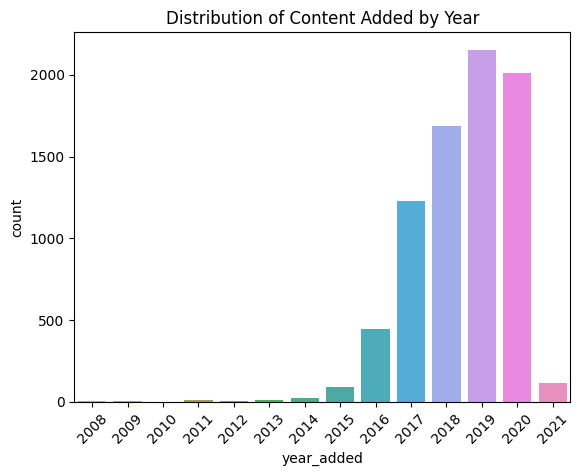

In [20]:
# Chart - 6 visualization code
# Visualize the distribution of content added by year
sns.countplot(x="year_added", data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Content Added by Year")
plt.show()

##### 1. Why did you pick the specific chart?

I picked a countplot because it is a good way to visualize the distribution of categorical data. In this case, the data is the year that content was added to Netflix.

##### 2. What is/are the insight(s) found from the chart?

The most content was added to Netflix in 2019.
There has been a steady increase in the amount of content added to Netflix each year.
There is a small dip in the amount of content added in 2021.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping Netflix to better understand when to add new content. For example, Netflix could add more content in the summer months when people have more free time.
There are no insights that lead to negative growth.

#### Chart - 7

In [21]:
# Chart - 7 visualization code
# Calculate the number of content added by month
df_monthly = df.groupby("month_added").size().reset_index(name="Count")

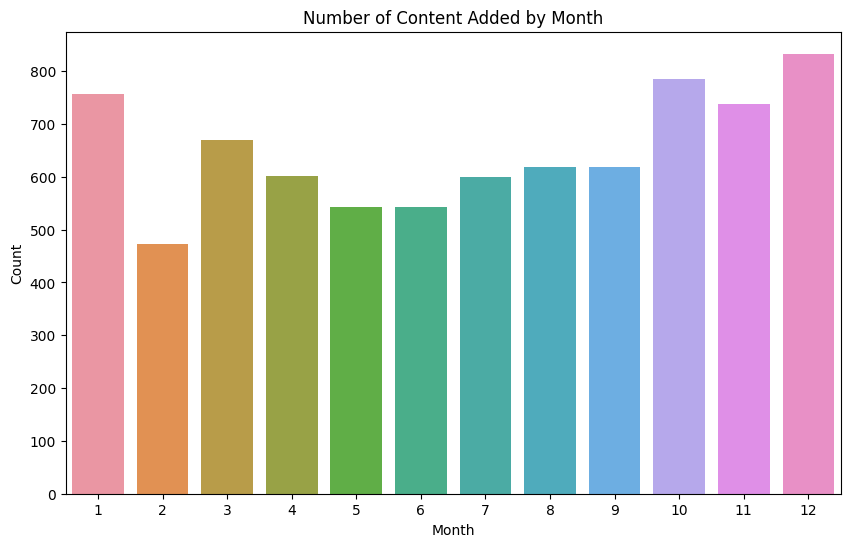

In [22]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='month_added', y='Count', data=df_monthly)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Number of Content Added by Month")
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Because it is a good way to visualize the distribution of numerical data. In this case, the data is the number of content added to Netflix by month.

##### 2. What is/are the insight(s) found from the chart?

The most content was added to Netflix in December.
There is a steady increase in the amount of content added to Netflix each month, except for a small dip in Feb.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping Netflix to better understand when to add new content. For example, Netflix could add more content in the months leading up to Christmas, when people have more free time and are looking for something to watch.
There are no insights that lead to negative growth. However,

#### Chart - 8

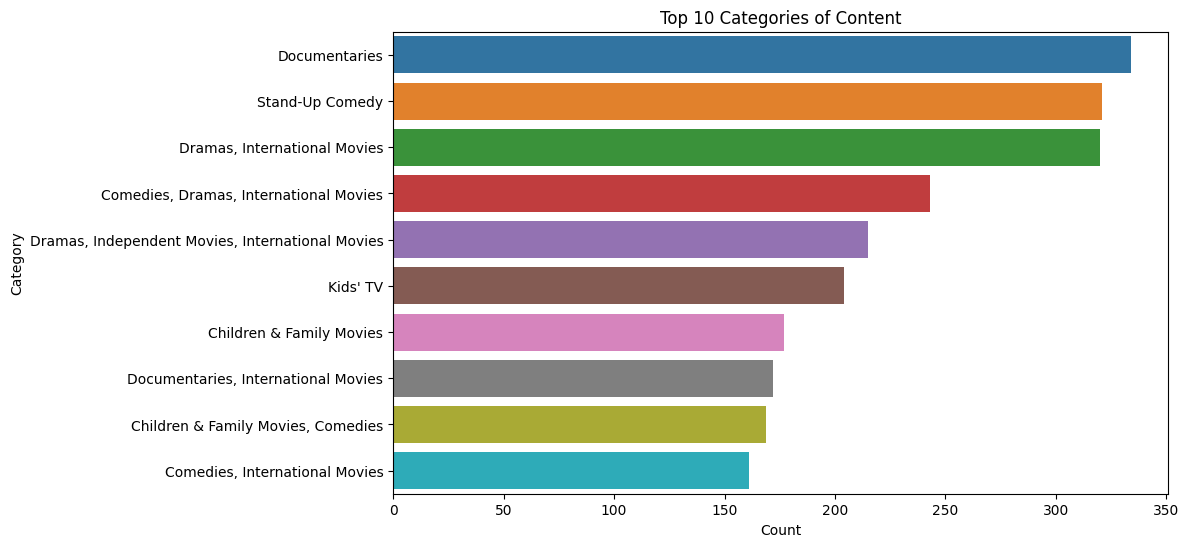

In [23]:
# Chart - 8 visualization code
# Count the occurrences of each category
category_counts = df["listed_in"].value_counts()

# Plot the top 10 categories
top_categories = category_counts.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Top 10 Categories of Content")
plt.show()

##### 1. Why did you pick the specific chart?

I picked a barplot because it is a good way to visualize the distribution of categorical data. In this case, the data is the category of content on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The top 10 categories of content on Netflix.
The category of content that is most popular on Netflix is Documentaries.
There is a wide variety of content available on Netflix, with something for everyone.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping Netflix to better understand what types of content its users are interested in. This information can then be used to make decisions about what types of content to produce and acquire in the future. For example, if Netflix knows that users are interested in drama, it can produce more drama content.
There are no insights that lead to negative growth.

#### Chart - 9

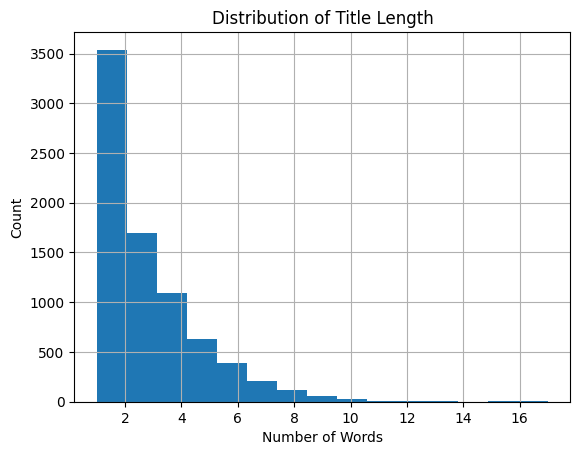

In [24]:
# Chart - 9 visualization code
word_counts = df['title'].str.split().apply(len)  # Word count of titles
word_counts.hist(bins=15)
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.title('Distribution of Title Length')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a histogram because it is a good way to visualize the distribution of numerical data. In this case, the data is the number of words in the titles of content on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The most common number of words in a title is 2.
There is a long tail of titles with more than 10 words.
There are a few titles with more than 10 words.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping Netflix to better understand how to title its content. For example, Netflix could use the insights to make sure that its titles are short and catchy, while still being informative.
There are no insights that lead to negative growth.

#### Chart - 10

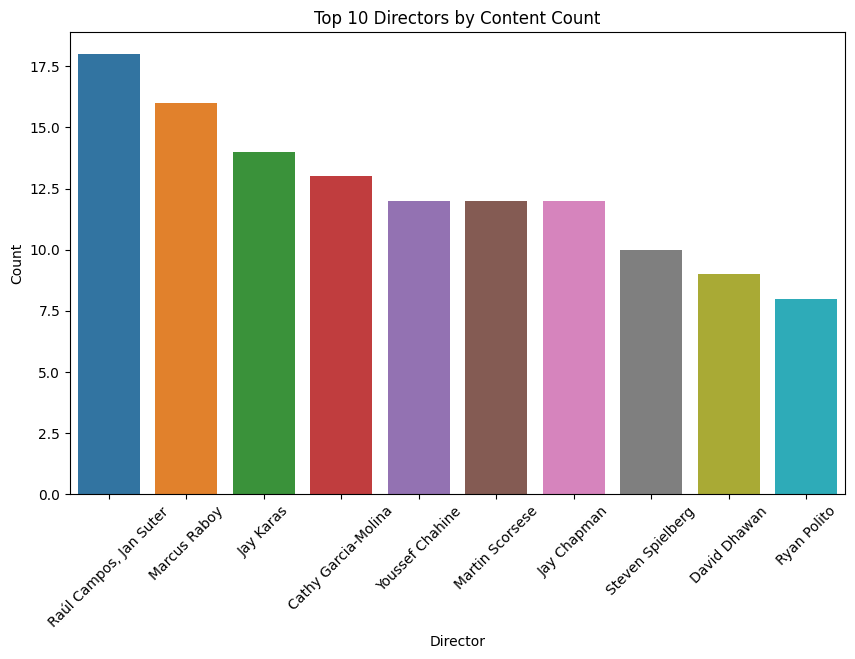

In [25]:
# Chart - 10 visualization code
director_counts = df["director"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=director_counts.index, y=director_counts.values)
plt.xlabel("Director")
plt.ylabel("Count")
plt.title("Top 10 Directors by Content Count")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a barplot because it is a good way to visualize the distribution of categorical data. In this case, the data is the number of content directed by each director on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The top 10 directors by content count on Netflix.
The director with the most content on Netflix is raul campos.
There is a wide variety of directors represented on Netflix, with something for everyone.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping Netflix to better understand which directors are popular with its users. This information can then be used to make decisions about which directors to work with in the future. For example, if Netflix knows that users are interested in content directed by raul campos, it can work with him on more projects.
There are no insights that lead to negative growth.

#### Chart - 11

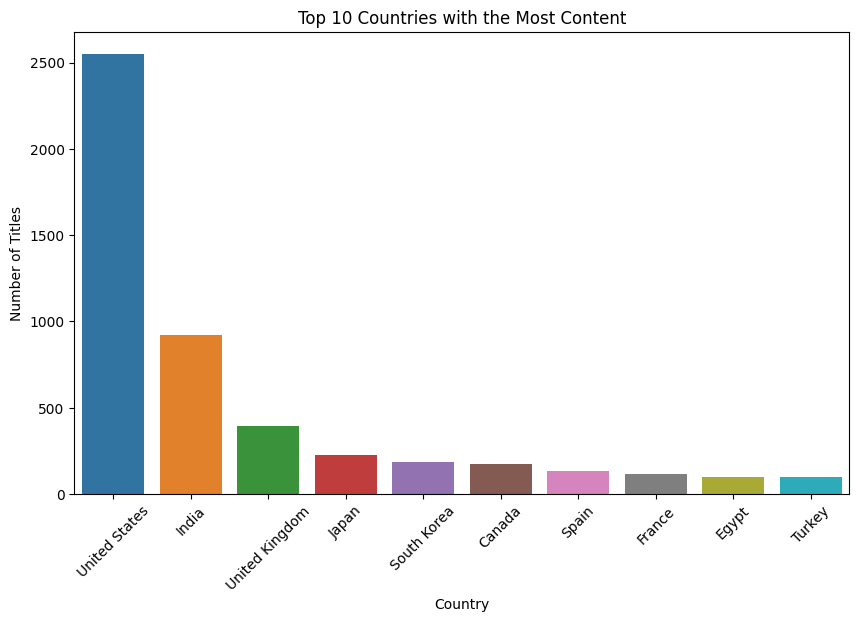

In [26]:
# Chart - 11 visualization code
# Top 10 countries with the most content
top_countries = df["country"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Top 10 Countries with the Most Content")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a barplot because it is a good way to visualize the distribution of categorical data. In this case, the data is the number of content produced by each country on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The top 10 countries with the most content on Netflix.
The United States produces the most content on Netflix.
There is a wide variety of countries represented on Netflix, with something for everyone.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping Netflix to better understand which countries are popular with its users. This information can then be used to make decisions about which countries to produce content in the future. For example, if Netflix knows that users are interested in content produced in the United States, it can produce more content in the United States.
There are no insights that lead to negative growth.

#### Chart - 12

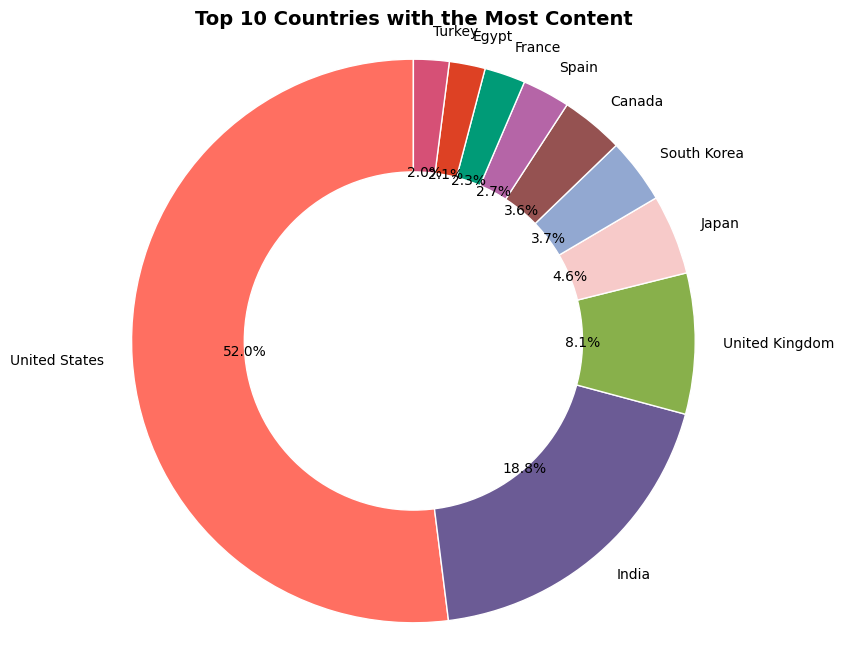

In [27]:
# Chart - 12 visualization code
# Top 10 countries with the most content
top_countries = df["country"].value_counts().head(10)

# Define custom colors for the pie chart
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', '#B565A7', '#009B77', '#DD4124', '#D65076']

plt.figure(figsize=(8, 8))
plt.pie(top_countries.values, labels=top_countries.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white'})
plt.title("Top 10 Countries with the Most Content", fontsize=14, fontweight='bold')
plt.axis('equal')
# Add a shadow to the pie chart
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='White'))
plt.show()

##### 1. Why did you pick the specific chart?

I picked a pie chart because it is a good way to visualize the distribution of categorical data. In this case, the data is the number of content produced by each country on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The United States produces the most content on Netflix, with over a quarter of the total content.
There is a wide variety of countries represented on Netflix, with each country accounting for at least 2.0% of the total content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping Netflix to better understand which countries are popular with its users. This information can then be used to make decisions about which countries to produce content in the future. For example, if Netflix knows that users are interested in content produced in the United States, it can produce more content in the United States.
There are no insights that lead to negative growth.

#### Chart - 13

In [28]:
# Extract the duration information and convert to numeric values
df["duration_numeric"] = df["duration"].str.extract("(\d+)", expand=False).astype(float)

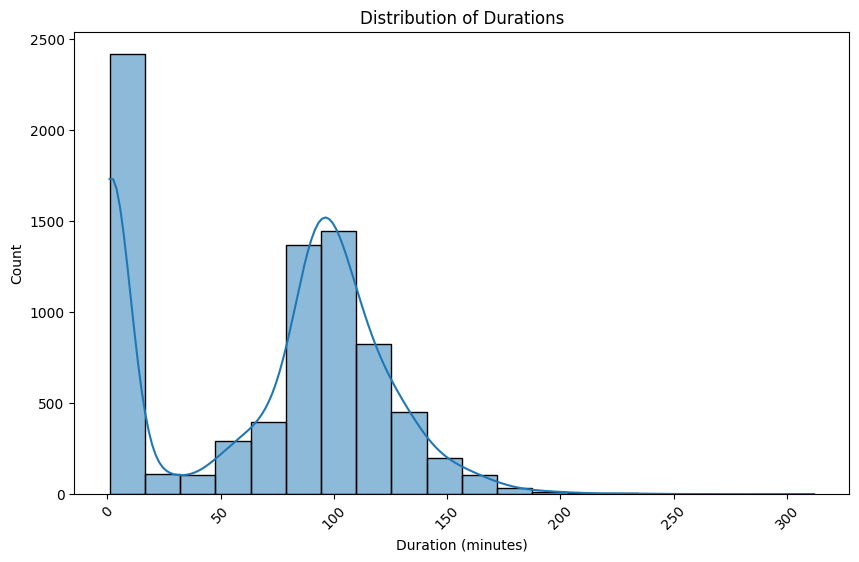

In [29]:
# Chart - 13 visualization code
# Histogram of duration
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="duration_numeric", bins=20, kde=True)
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.title("Distribution of Durations")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a histogram because it is a good way to visualize the distribution of continuous data. In this case, the data is the duration of content on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The most common duration for content on Netflix is around 1.5 hour.
There is a long tail of content with longer durations, up to 1.5 hours or more.
There is a small number of content with very short durations, less than 50 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by helping Netflix to better understand how users watch content. For example, if Netflix knows that users prefer content that is around 1 hour long, it can produce more content in that range.
There are no insights that lead to negative growth.

#### Chart - 14 - Correlation Heatmap

In [30]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)

In [31]:
# checking top 10 countries
df['count'] = 1
data= df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending = False).reset_index()[:10]
data = data['country']
data

<ipython-input-31-f4b385e89858>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data= df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending = False).reset_index()[:10]


0     United States
1             India
2    United Kingdom
3             Japan
4       South Korea
5            Canada
6             Spain
7            France
8             Egypt
9            Mexico
Name: country, dtype: object

In [32]:
# Preparing data for heatmap
df['count'] = 1
# Top 10 countries based on count
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:12]
data = data['country']

df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize = "index").T
df_heatmap

<ipython-input-32-fdd0822851d9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:12]


country                  Australia    Canada     Egypt    France     India  \
rating                                                                       
Adult Content             0.469136  0.435028  0.277228  0.669565  0.249187   
Children Content          0.222222  0.254237  0.039604  0.052174  0.157096   
Family-friendly Content   0.123457  0.152542  0.000000  0.104348  0.019502   
Not Rated                 0.024691  0.011299  0.000000  0.008696  0.006501   
Teen Content              0.160494  0.146893  0.683168  0.165217  0.567714   

country                     Japan  Mexico  South Korea     Spain  Turkey  \
rating                                                                     
Adult Content            0.366071    0.73     0.453552  0.828358    0.50   
Children Content         0.200893    0.07     0.087432  0.052239    0.11   
Family-friendly Content  0.080357    0.02     0.060109  0.014925    0.00   
Not Rated                0.000000    0.04     0.016393  0.007463    0.03   
Teen Content             0.352679    0.14     0.382514  0.097015    0.36   

country                  United Kingdom  United States  
rating                                                  
Adult Content                  0.500000       0.488610  
Children Content               0.244949       0.192066  
Family-friendly Content        0.053030       0.068735  
Not Rated                      0.012626       0.013747  
Teen Content                   0.189394       0.236842

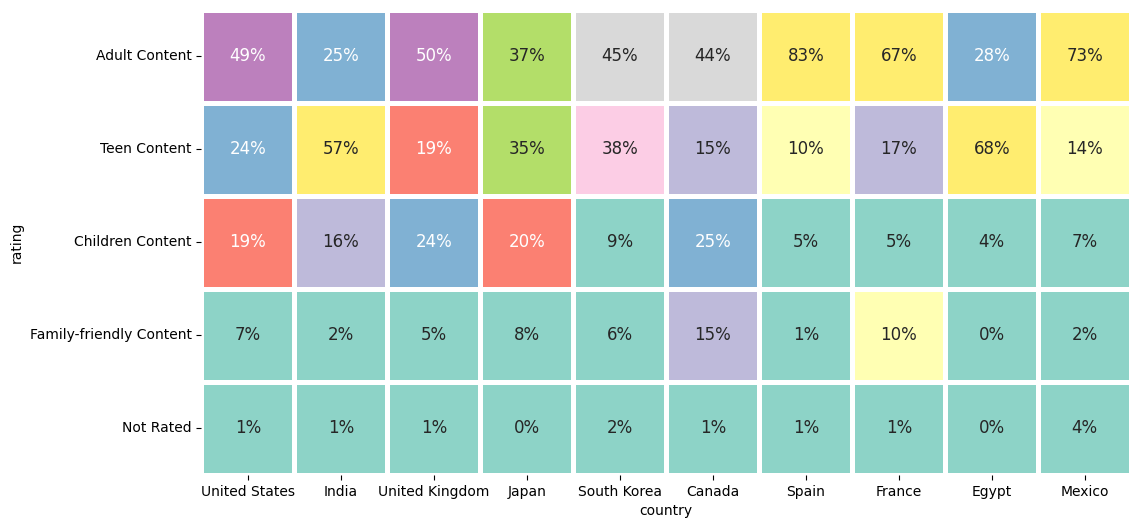

In [33]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# setting order
country_order = ['United States', 'India', 'United Kingdom','Japan', 'South Korea', 'Canada', 'Spain', 'France','Egypt', 'Mexico']

age_order = ['Adult Content','Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# calling and plotting heatmap
sns.heatmap(df_heatmap.loc[age_order,country_order],cmap='Set3',square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

Correlations are best represented using heat maps. Heat Maps is used to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

##### 2. What is/are the insight(s) found from the chart?

We found that most of the countries produces content related to Adult and Teen.
Spain, Maxico and France produces most of the adult content.
Egypt, India produces most of the Teen content.
Canada produces Children and Family content in better ratio in compaired with other countries, along with Adult and teen content.
India has less Adult content with respect to other top countries.

#### Chart - 15 - Pair Plot

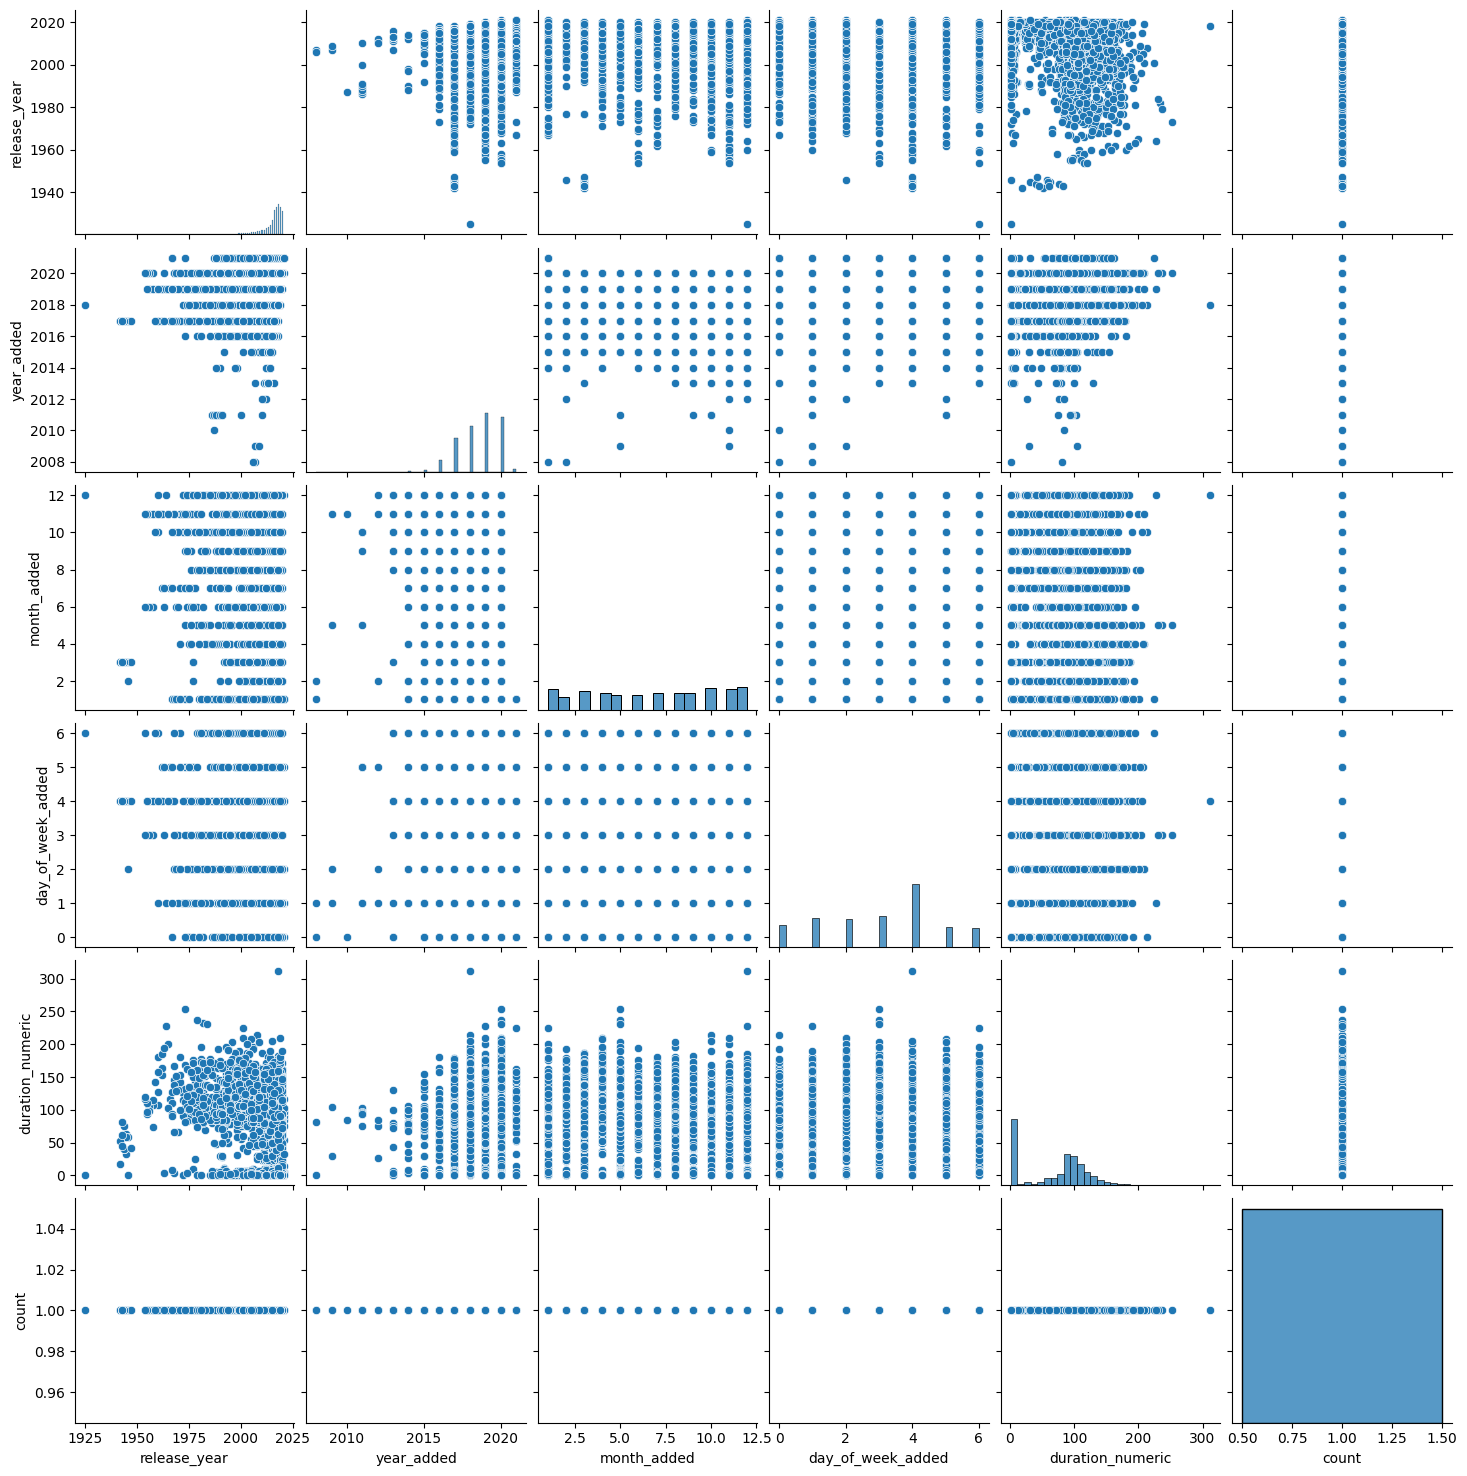

In [34]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a pairplot because it is a good way to visualize the relationships between multiple variables. In this case, the data is the numerical variables in the Netflix dataset.

##### 2. What is/are the insight(s) found from the chart?

There is a positive correlation between the duration of content and the number of ratings. This means that longer content tends to receive more ratings.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**1.**Null Hypothesis : The proportion of TV shows added on Netflix that are produced in the India is not significantly different from the proportion of movies added on Netflix that are produced in the India.

Alternative Hypothesis: The proportion of TV shows added on Netflix that are produced in the India is significantly different from the proportion of movies added on Netflix that are produced in the India.

**2.**Null Hypothesis: - The Country is independent of Target_ages.

Alternative Hypothesis: - The Country is associated with Target_ages.

**3.**Null Hypothesis: The proportion of TV shows added on Netflix that contains Adult content is not significantly different from the proportion of movies added on Netflix that contains Teen content.

Alternative Hypothesis: The proportion of TV shows added on Netflix that contains Adult content is significantly different from the proportion of movies added on Netflix that contains Teen content.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**1.**Null Hypothesis : The proportion of TV shows added on Netflix that are produced in the India is not significantly different from the proportion of movies added on Netflix that are produced in the India.

Alternative Hypothesis: The proportion of TV shows added on Netflix that are produced in the India is significantly different from the proportion of movies added on Netflix that are produced in the India.

**2.**Null Hypothesis: - The Country is independent of Target_ages.

Alternative Hypothesis: - The Country is associated with Target_ages.

**3.**Null Hypothesis: The proportion of TV shows added on Netflix that contains Adult content is not significantly different from the proportion of movies added on Netflix that contains Teen content.

Alternative Hypothesis: The proportion of TV shows added on Netflix that contains Adult content is significantly different from the proportion of movies added on Netflix that contains Teen content.

#### 2. Perform an appropriate statistical test.

In [35]:
# Splitting datasets for movies and tv show
df_movies= df[df['type']== 'Movie']
df_tvshows= df[df['type']== 'TV Show']

In [36]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Calculate the proportion of drama and comedy movies
tv_proportion = np.sum(df_tvshows['country'].str.contains('India')) / len(df_tvshows)
movie_proportion = np.sum(df_movies['country'].str.contains('India')) / len(df_movies)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(df_tvshows)), int(movie_proportion * len(df_movies))]
nobs = [len(df_tvshows), len(df_movies)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")

z-statistic:  -16.978040426936968
p-value:  1.1940679000134127e-64
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P-Value is a two-sample proportion test.

##### Why did you choose the specific statistical test?

We chose this specific statistical test because it is appropriate for comparing two proportions, and it helps us to determine whether the difference between the two proportions is due to chance or not.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: - The Country is independent of Target_ages.

Alternative Hypothesis: - The Country is associated with Target_ages.

#### 2. Perform an appropriate statistical test.

In [37]:
# Preparing data for heatmap
df['count'] = 1
# Top 10 countries based on count
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()
data = data['country']

df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize = "index").T
hypothesis = df_heatmap.T

<ipython-input-37-2b0f95c9a59e>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()


In [38]:
hypothesis

rating                                              Adult Content  \
country                                                             
Argentina                                                     0.7   
Argentina, Brazil, France, Poland, Germany, Den...            0.0   
Argentina, Chile                                              0.0   
Argentina, Chile, Peru                                        1.0   
Argentina, France                                             1.0   
...                                                           ...   
Venezuela                                                     0.0   
Venezuela, Colombia                                           0.0   
Vietnam                                                       0.4   
West Germany                                                  1.0   
Zimbabwe                                                      0.0   

rating                                              Children Content  \
country                                                                
Argentina                                                       0.08   
Argentina, Brazil, France, Poland, Germany, Den...              0.00   
Argentina, Chile                                                0.00   
Argentina, Chile, Peru                                          0.00   
Argentina, France                                               0.00   
...                                                              ...   
Venezuela                                                       0.00   
Venezuela, Colombia                                             0.00   
Vietnam                                                         0.20   
West Germany                                                    0.00   
Zimbabwe                                                        1.00   

rating                                              Family-friendly Content  \
country                                                                       
Argentina                                                              0.04   
Argentina, Brazil, France, Poland, Germany, Den...                     0.00   
Argentina, Chile                                                       0.00   
Argentina, Chile, Peru                                                 0.00   
Argentina, France                                                      0.00   
...                                                                     ...   
Venezuela                                                              0.00   
Venezuela, Colombia                                                    0.00   
Vietnam                                                                0.00   
West Germany                                                           0.00   
Zimbabwe                                                               0.00   

rating                                              Not Rated  Teen Content  
country                                                                      
Argentina                                                0.04          0.14  
Argentina, Brazil, France, Poland, Germany, Den...       0.00          1.00  
Argentina, Chile                                         0.00          1.00  
Argentina, Chile, Peru                                   0.00          0.00  
Argentina, France                                        0.00          0.00  
...                                                       ...           ...  
Venezuela                                                0.00          1.00  
Venezuela, Colombia                                      1.00          0.00  
Vietnam                                                  0.00          0.40  
West Germany                                             0.00          0.00  
Zimbabwe                                                 0.00          0.00  

[681 rows x 5 columns]

In [39]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
X2, p_value, degree_freedom, expected_values = chi2_contingency(hypothesis, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value))

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")

X2: 2323.1690610709484, P-Value: 0.9999999923248291
Fail to reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P-Value is Chi Square Test

##### Why did you choose the specific statistical test?

A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: The proportion of TV shows added on Netflix that contains Adult content is not significantly different from the proportion of movies added on Netflix that contains Teen content.

Alternative Hypothesis: The proportion of TV shows added on Netflix that contains Adult content is significantly different from the proportion of movies added on Netflix that contains Teen content.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Calculate the proportion of Adult Content and Teen Content
tv_proportion = np.sum(df_tvshows['rating'].str.contains('Adult Content')) / len(df_tvshows)
movie_proportion = np.sum(df_movies['rating'].str.contains('Teen Content')) / len(df_movies)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(df_tvshows)), int(movie_proportion * len(df_movies))]
nobs = [len(df_tvshows), len(df_movies)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")

z-statistic:  9.930716957102842
p-value:  3.0604699869202875e-23
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P-Value is a two-sample proportion test.

##### Why did you choose the specific statistical test?

We chose this specific statistical test because it is appropriate for comparing two proportions, and it helps us to determine whether the difference between the two proportions is due to chance or not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [41]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

show_id                 0
type                    0
title                   0
director             2379
cast                  718
country               506
date_added              0
release_year            0
rating                  7
duration                0
listed_in               0
description             0
year_added              0
month_added             0
day_of_week_added       0
duration_numeric        0
count                   0
dtype: int64

In [42]:
# check for mode of country
print(df['country'].mode()[0])

United States


In [43]:
## Imputing null value
# imputing with unknown in null values of director and cast feature
df[['director','cast']]=df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
#df['country']=df['country'].fillna(df['country'].mode()[0],inplace=True)
df['country']=df['country'].fillna('United States')

In [44]:
# Dropping remaining null values of rating
df.dropna(subset=['date_added','rating'],inplace=True)

In [45]:

df = df.drop(['date_added','year_added','month_added','day_of_week_added', 'duration_numeric', 'count' ], axis=1)

In [46]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Null values of country column were replaced by mode of thet column, as a country producing most of the content might be a better option for replacement of null value.

Director and cast columns with maximum number of null values cannot be replaced with mode therefore we have replaced them with "unknown".

null values of rating and date_added have been dropped, as there were very few null values in rating columns.


### 2. Handling Outliers

In [47]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [48]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [49]:
# Expand Contraction
New_df = df[['title']].copy()
New_df.loc[:, 'cluster_data'] = df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating']
New_df.set_index('title', inplace=True)
New_df.head()

cluster_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...
23:59  When an army recruit is found dead, his fellow...
9      In a postapocalyptic world, rag-doll robots hi...
21     A brilliant group of students become card-coun...

#### 2. Lower Casing

In [50]:
# Lower Casing
New_df['cluster_data'] = New_df['cluster_data'].str.lower()

In [51]:
# check for updation
New_df['cluster_data'][0]

'in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. international tv shows, tv dramas, tv sci-fi & fantasy unknown joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil adult content'

#### 3. Removing Punctuations

In [52]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

New_df['cluster_data'] = New_df['cluster_data'].apply(remove_punctuation)
New_df['cluster_data'][0]

'in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor international tv shows tv dramas tv scifi  fantasy unknown joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil adult content'

#### 4. Removing URLs & Removing words and digits contain digits.

In [53]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = re.sub(url_number_pattern, '', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Return the text stripped off URL's and Numbers
    return text

In [54]:
# Apply the function to the 'cluster_data' column using .loc accessor
New_df.loc[:, 'cluster_data'] = New_df['cluster_data'].apply(remove_url_and_numbers)
New_df['cluster_data'][0]

'in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the   saved from squalor international tv shows tv dramas tv scifi  fantasy unknown jo o miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez  motta celso frateschi brazil adult content'

#### 5. Removing Stopwords & Removing White spaces

In [55]:
# Remove Stopwords
nltk.download('stopwords')
stop_words=stopwords.words('english')
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    text =  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

New_df['cluster_data'] = New_df['cluster_data'].apply(stopwords)
# Checking the observation after manipulation
New_df['cluster_data'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'future elite inhabit island paradise far crowded slums get one chance join saved squalor international tv shows tv dramas tv scifi fantasy unknown jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil adult content'

#### 6. Rephrase Text

In [56]:
# Rephrase Text

#### 7. Tokenization

In [57]:
# Tokenization
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
New_df['cluster_data'] = New_df['cluster_data'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
New_df['cluster_data'][0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['future',
 'elite',
 'inhabit',
 'island',
 'paradise',
 'far',
 'crowded',
 'slums',
 'get',
 'one',
 'chance',
 'join',
 'saved',
 'squalor',
 'international',
 'tv',
 'shows',
 'tv',
 'dramas',
 'tv',
 'scifi',
 'fantasy',
 'unknown',
 'jo',
 'miguel',
 'bianca',
 'comparato',
 'michel',
 'gomes',
 'rodolfo',
 'valente',
 'vaneza',
 'oliveira',
 'rafael',
 'lozano',
 'viviane',
 'porto',
 'mel',
 'fronckowiak',
 'sergio',
 'mamberti',
 'zez',
 'motta',
 'celso',
 'frateschi',
 'brazil',
 'adult',
 'content']

#### 8. Text Normalization

In [58]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [59]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [60]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Rephrasing text by applying defined lemmatizing function
New_df['cluster_data'] = New_df['cluster_data'].apply(lemmatizing_sentence)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [61]:
# Checking the observation after manipulation
New_df['cluster_data'][0]

'future elite inhabit island paradise far crowded slum get one chance join saved squalor international tv show tv drama tv scifi fantasy unknown jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil adult content'

##### Which text normalization technique have you used and why?

We have used Lemmatization instead of Stemming for our project because:

**Lemmatization produces a more accurate base word:** Unlike Stemming, which simply removes the suffix from a word, Lemmatization looks at the meaning of the word and its context to produce a more accurate base form.

**Lemmatization can handle different inflections:** Lemmatization can handle various inflections of a word, including plural forms, verb tenses, and comparative forms, making it useful for natural language processing.

**Lemmatization produces real words:** Lemmatization always produces a real word that can be found in a dictionary, making it easier to interpret the results of text analysis.

**Lemmatization improves text understanding:** By reducing words to their base form, Lemmatization makes it easier to understand the context and meaning of a sentence.

**Lemmatization supports multiple languages:** While Stemming may only work well for English, Lemmatization is effective for many different languages, making it a more versatile text processing technique.

#### 9. Part of speech tagging

In [62]:
# POS Taging
# tokenize the text into words before POS Taging
New_df['pos_tags'] = New_df['cluster_data'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
New_df.head(5)

cluster_data  \
title                                                      
3%     future elite inhabit island paradise far crowd...   
7:19   devastating earthquake hit mexico city trapped...   
23:59  army recruit found dead fellow soldier forced ...   
9      postapocalyptic world ragdoll robot hide fear ...   
21     brilliant group student become cardcounting ex...   

                                                pos_tags  
title                                                     
3%     [(future, JJ), (elite, JJ), (inhabit, NN), (is...  
7:19   [(devastating, VBG), (earthquake, NN), (hit, V...  
23:59  [(army, NN), (recruit, NN), (found, VBN), (dea...  
9      [(postapocalyptic, JJ), (world, NN), (ragdoll,...  
21     [(brilliant, JJ), (group, NN), (student, NN), ...

#### 10. Text Vectorization

In [63]:
X = New_df.cluster_data

In [64]:
# Tranforming data
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(X)

In [65]:
# shape of vectorized data
print(X.shape)

(7770, 20000)


##### Which text vectorization technique have you used and why?

We have used TFIDF vectorization in place of BAG OF WORDS because Tf-idf vectorization takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [66]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [67]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [68]:
# Transform Your data

### 6. Data Scaling

In [69]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?



* Fewer features mean less complexity.
* You will need less storage space because you have fewer data.
* Fewer features require less computation time.
* Model accuracy improves due to less misleading data.
* Reducing the data set’s feature dimensions helps visualize the data faster.
* It removes noise and redundant features.

there are 30,000 arrtibutes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.


It is clear from the above plot that **7770 principal components can capture the 100% of variance.** For our case we will consider only those number of PC's that can capture 95% of variance.

In [70]:
#Reducing the componets of X values into 0.95 principal component axes for efficiency
from sklearn.decomposition import PCA
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(7770, 5660)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used Principle Component Analysis as the key aim of PCA is to reduce the number of variables of a data set, while preserving as much information as possible.

### 8. Data Splitting

In [71]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [72]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***




### ML Model - 1. K-Means Clustering


K-means clustering is a type of unsupervised machine learning algorithm used for partitioning a dataset into K clusters based on similarity of data points. The goal of the algorithm is to minimize the sum of squared distances between each data point and its corresponding cluster centroid. It works iteratively by assigning each data point to its nearest centroid and then re-computing the centroid of each cluster based on the new assignments. The algorithm terminates when the cluster assignments no longer change or when a maximum number of iterations is reached.

Let's just itterate over a loop of 1 to 16 clusters and try to find the optimal number of clusters with ELBOW method.

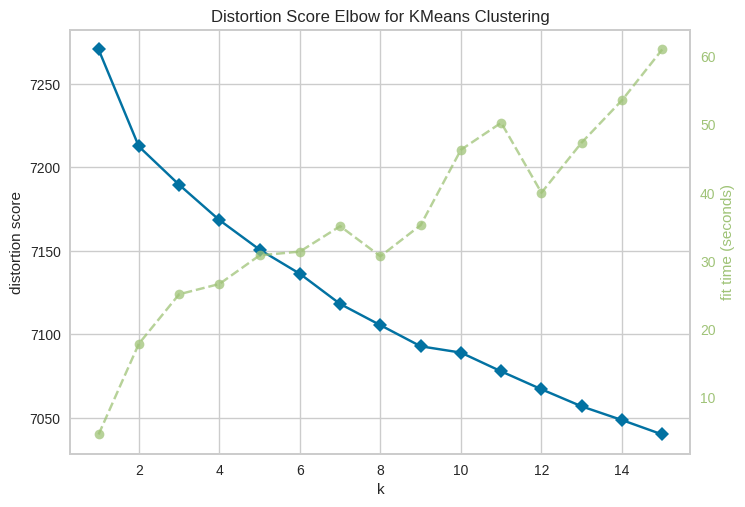

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0, n_init=10)  # Set n_init explicitly
visualizer = KElbowVisualizer(model, k=(1, 16), locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X_transformed)

# Finalize and render the figure
visualizer.show()

Here it seems that the elbow is forming at the 2 clusters but before blindly believing it let's plot one more chart that itterates over the same number of cluters and determines the Silhouette Score at every point.

Okay, but what is Silhouette Score?

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It is used to evaluate the quality of clustering, where a higher score indicates that objects are more similar to their own cluster and dissimilar to other clusters.

The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster, and poorly-matched to neighboring clusters. Conversely, a score of -1 indicates that the object is poorly-matched to its own cluster, and well-matched to neighboring clusters.

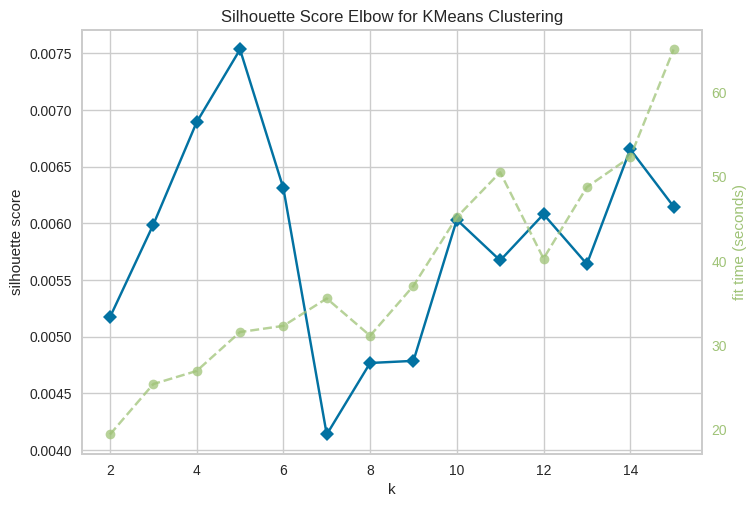

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [74]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X_transformed)

# Finalize and render the figure
visualizer.show()

In [75]:
from sklearn.metrics import silhouette_score

In [76]:
# Defining Range
k_range = range(2, 7)

for k in k_range:
    Kmodel = KMeans(n_clusters=k, n_init=10)  # Set n_init explicitly
    labels = Kmodel.fit_predict(X_transformed)
    score = silhouette_score(X_transformed, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.005172
k=3, Silhouette score=0.006048
k=4, Silhouette score=0.006892
k=5, Silhouette score=0.006828
k=6, Silhouette score=0.006066


From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 4 number of clusters, so we will consider 4 cluster in kmeans analysis.

Now let's plot and see how our data points look like after assigning to their respective clusters.

In [77]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(X_transformed)
    score = silhouette_score(X, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=2, Silhouette score=0.005201


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=3, Silhouette score=0.006061


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=4, Silhouette score=0.006822


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=5, Silhouette score=0.007517


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=6, Silhouette score=0.005954


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


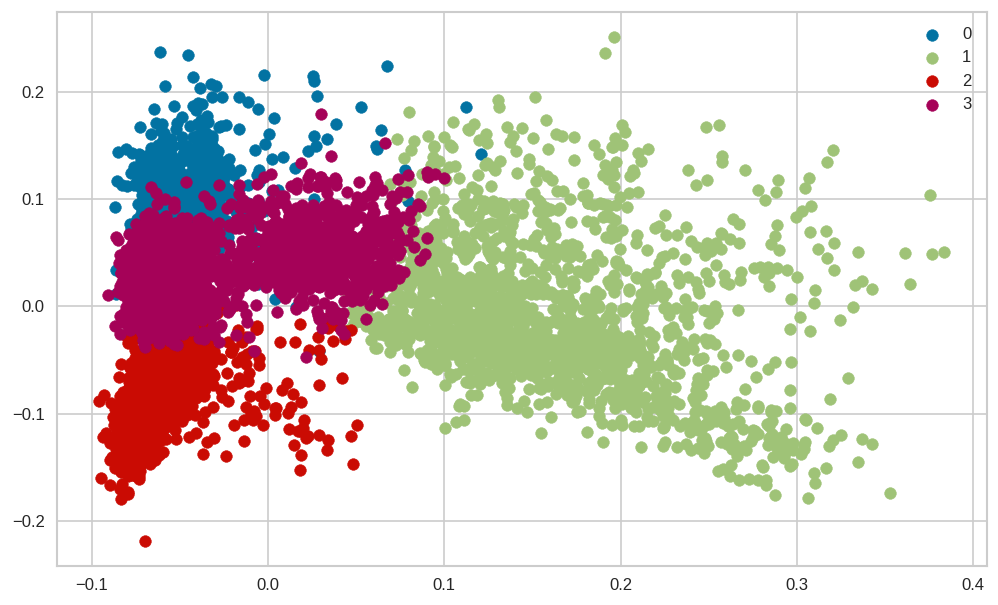

In [78]:

#training the K-means model on a dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()


We have 4 different clusters but unfortunately the above plot is in TWO-DIMENSIONAL. Let's plot the above figure in 3D using mplot3d library and see if we are getting the separated clusters.

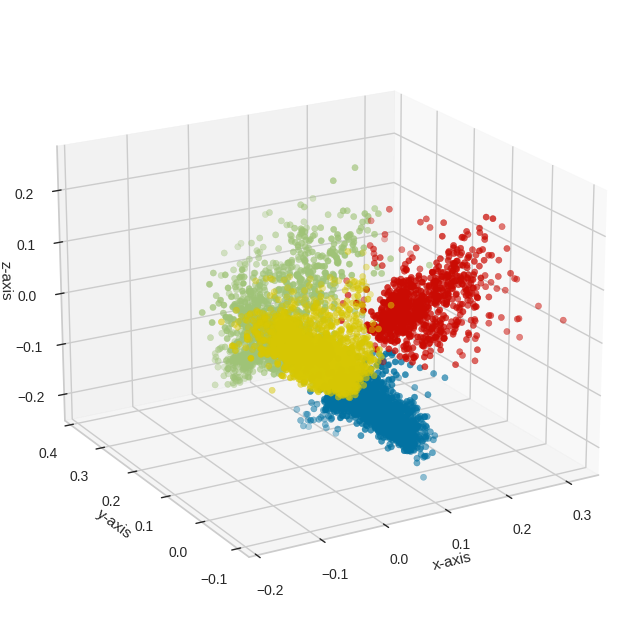

In [79]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(X_transformed[kmeans.labels_ == i, 2], X_transformed[kmeans.labels_ == i, 0], X_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Cool, we can easily differentiate the all 4 clusters with nacked eye. Now let's assign the 'Conent' in their respective cluster by appending 1 more attribute in the final dataframe.

In [80]:
# Add cluster values to the dateframe.
df['kmeans_cluster'] = kmeans.labels_

In [81]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = df[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array


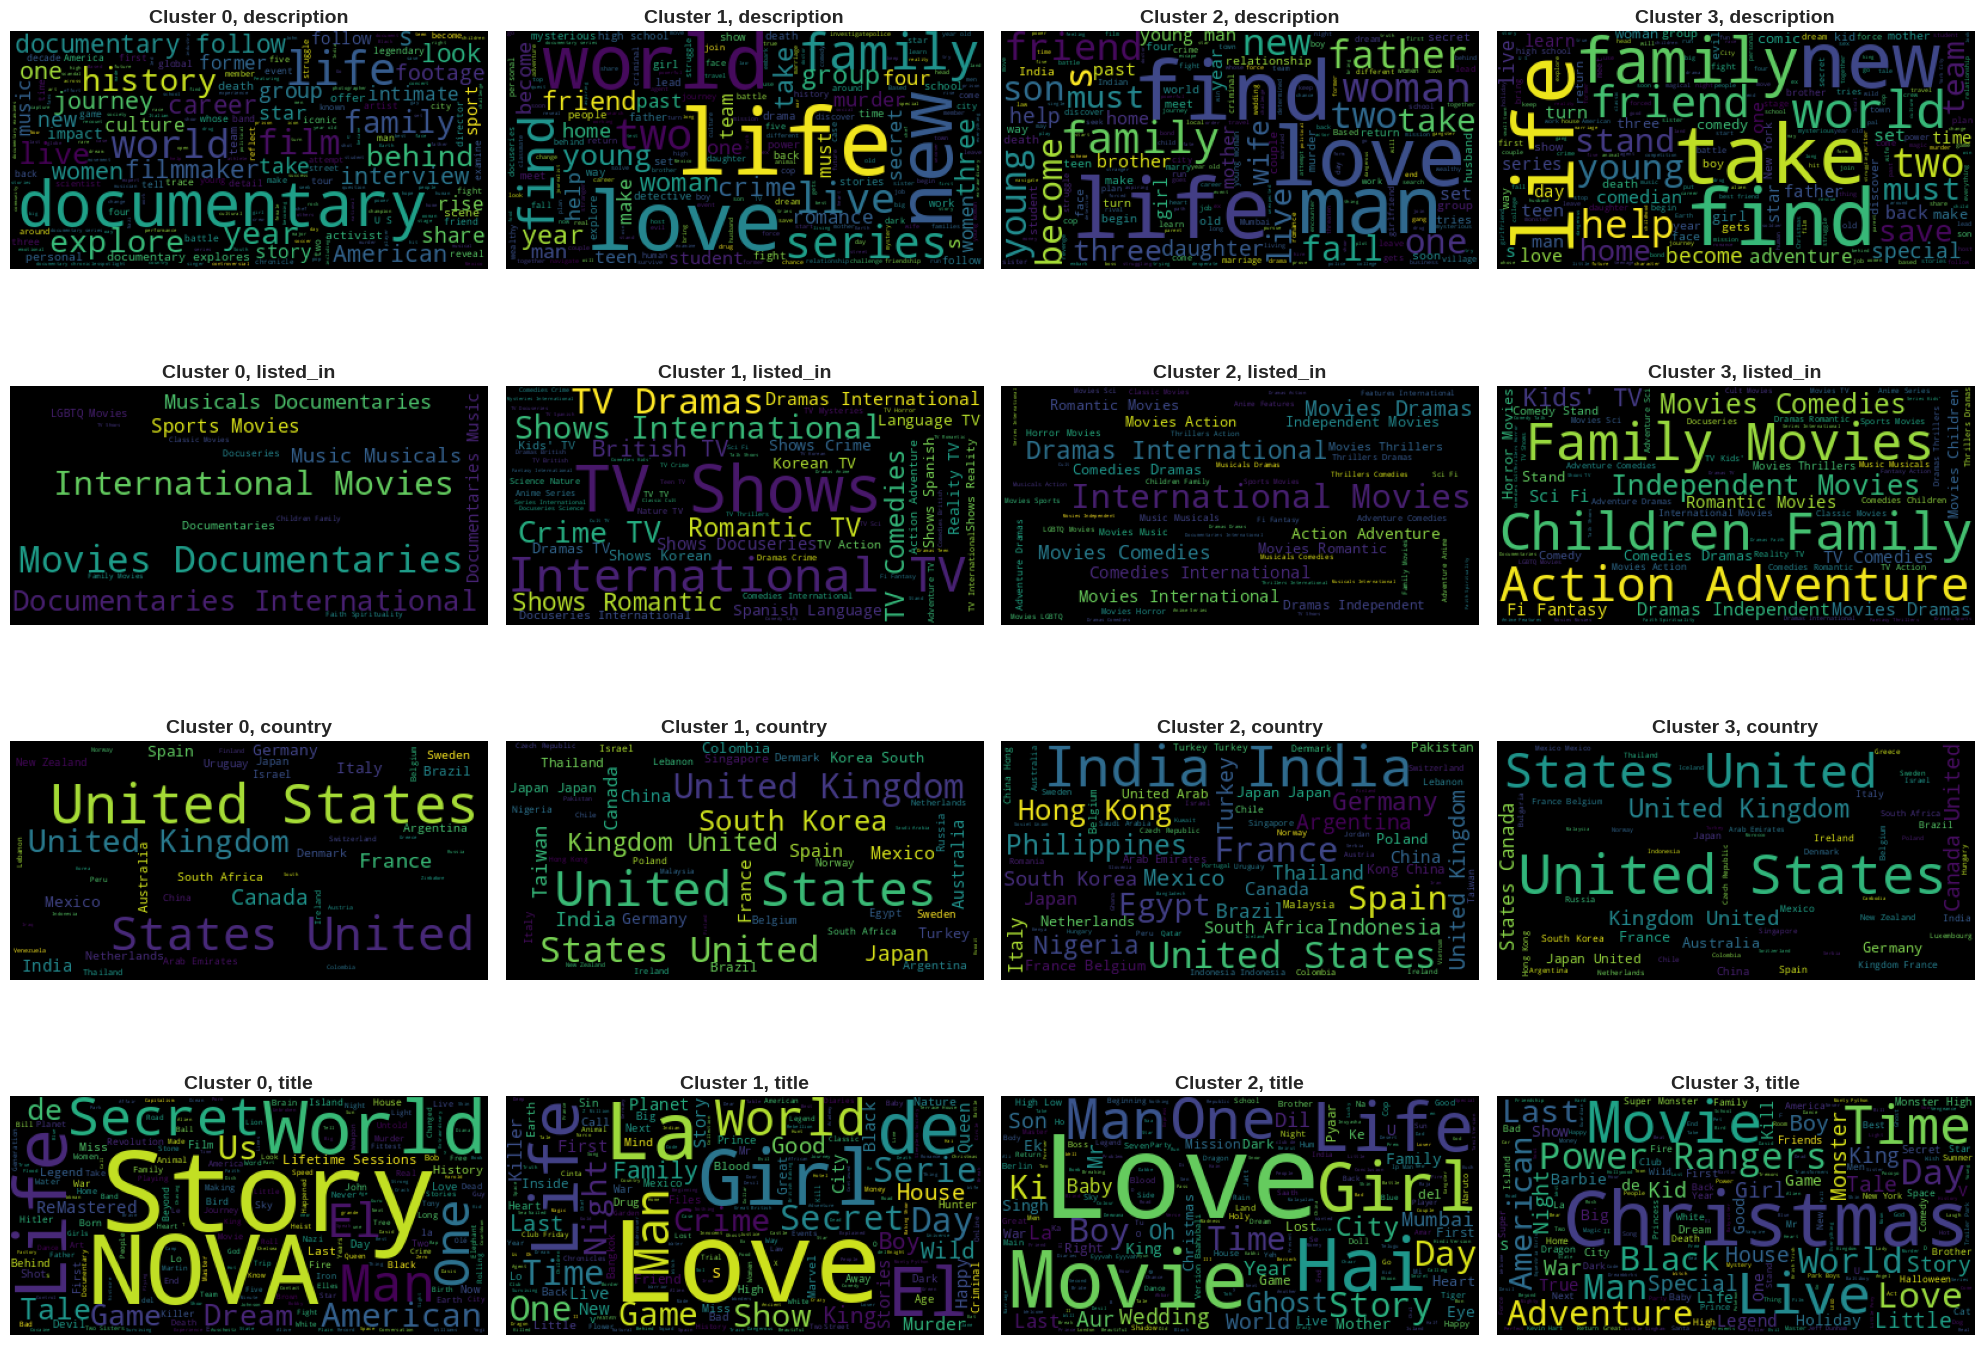

In [82]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Hierarchical clustering is a type of clustering algorithm used for grouping similar data points together into clusters based on their similarity, by recursively merging or dividing clusters based on a measure of similarity or distance between them.

Let's dive into it by plotting a Dendogram and then we will determine the optimal number of clusters.

#### 2. Cross- Validation & Hyperparameter Tuning

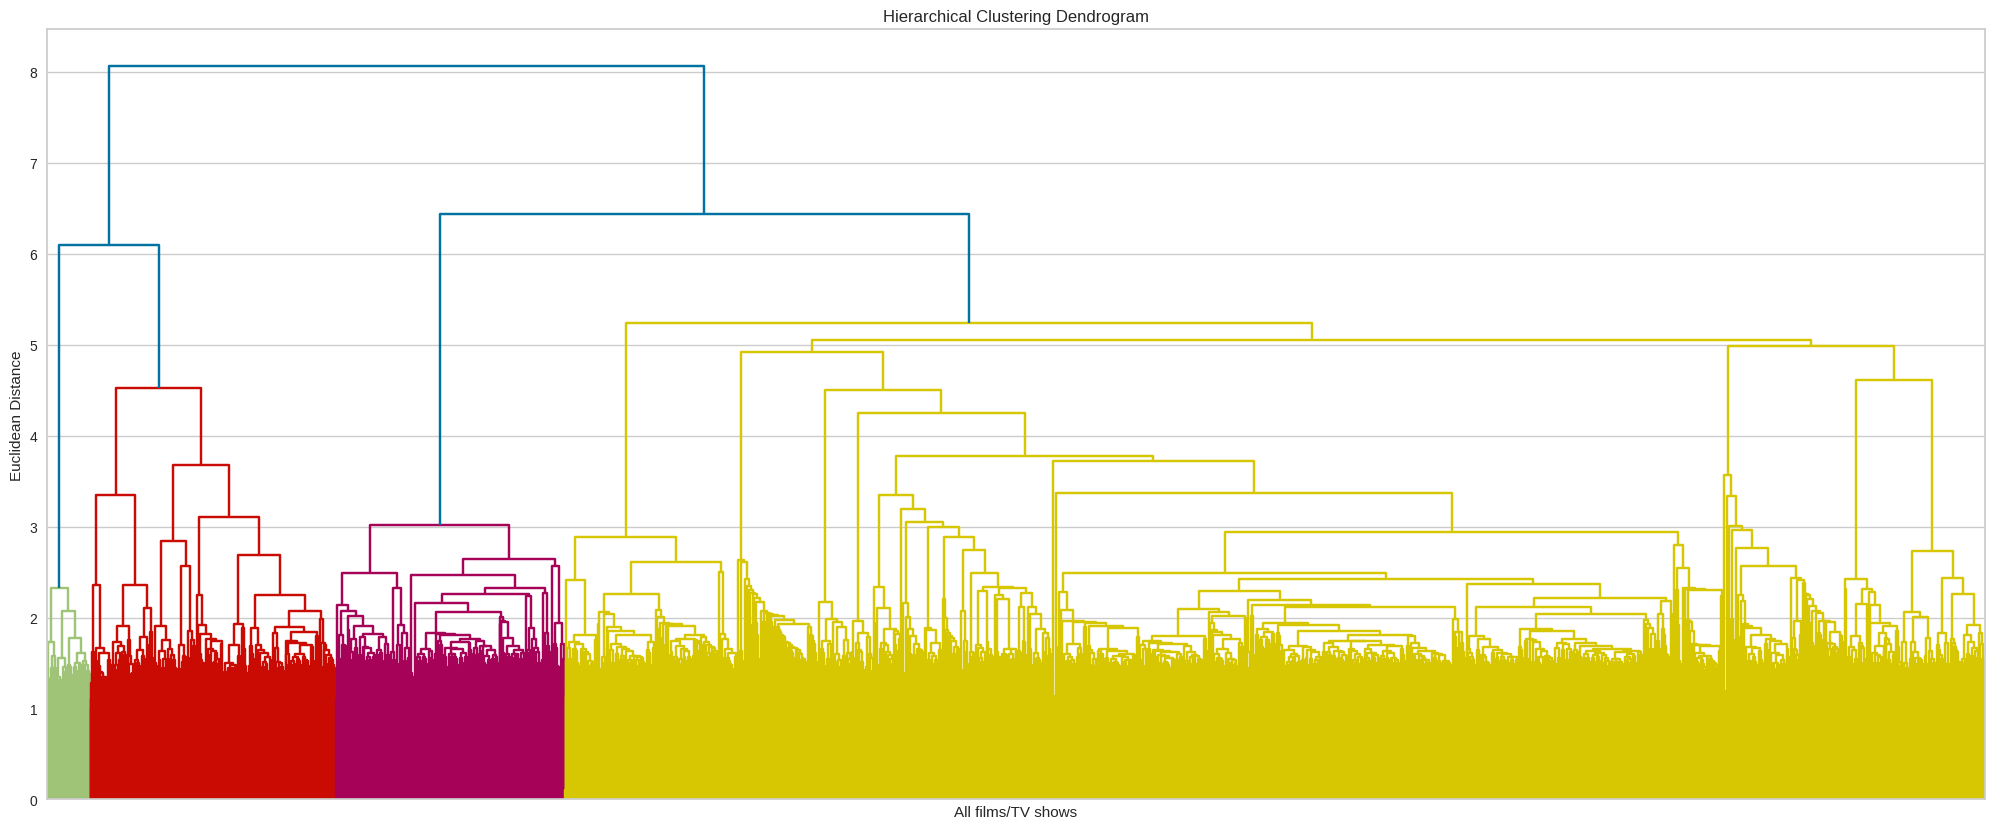

In [83]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(X_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Cool, but what is Dendogram and how to determine the optimal value of clusters?

A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
From the above Dendogram we can say that optimal value of clusters is 2. But before assigning the vlaues to respective clusters, let's check the solhoutte scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.

In [84]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 10)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_transformed)
    score = silhouette_score(X, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.001410
k=3, Silhouette score=0.002127
k=4, Silhouette score=0.000283
k=5, Silhouette score=0.000605
k=6, Silhouette score=0.001308
k=7, Silhouette score=0.001804
k=8, Silhouette score=0.002194
k=9, Silhouette score=0.002714


From the above silhouette scores it is clear that the 2 clusters are optimal value (maximum Silhouette score), which is also clear from the above Dendogram that for 2 cluters the euclidean distances are maximum.

Let's again plot the chart and observe the 2 different formed clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


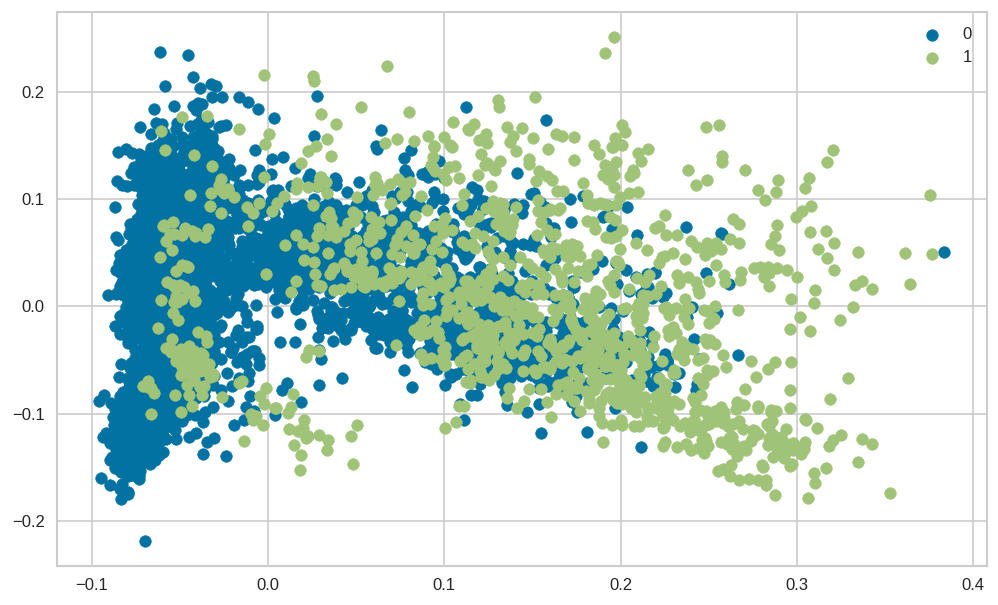

In [85]:
#training the K-means model on a dataset
Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

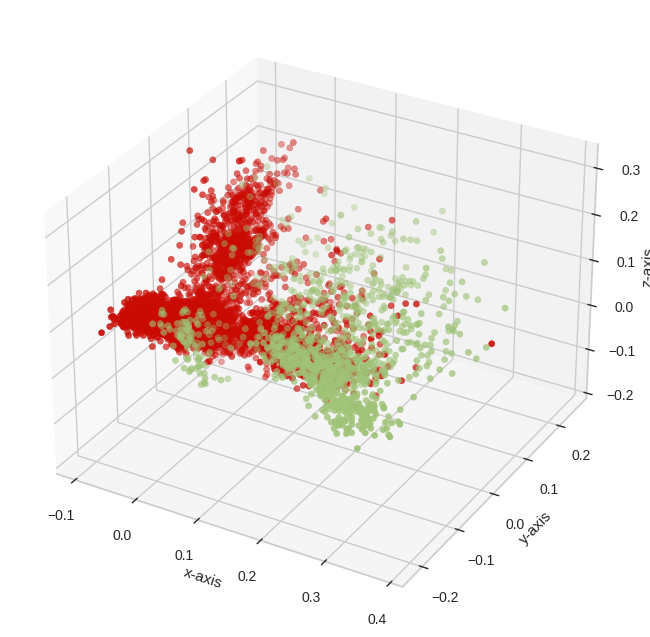

In [86]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(X_transformed[Agmodel.labels_ == i, 0], X_transformed[Agmodel.labels_ == i, 1], X_transformed[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Cool, we can again easily differentiate the all 2 clusters with nacked eye. Now let's assign the 'Conent(Movies and TV Shows)' in their respective cluster by appending 1 more attribute in the final dataframe.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Let's just again define a function that plots wordcloud for different attributes using Agglomerative Clustering.

In [97]:
# Add cluster values to the dateframe.
df['agglomerative_cluster'] = Agmodel.labels_

In [100]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud


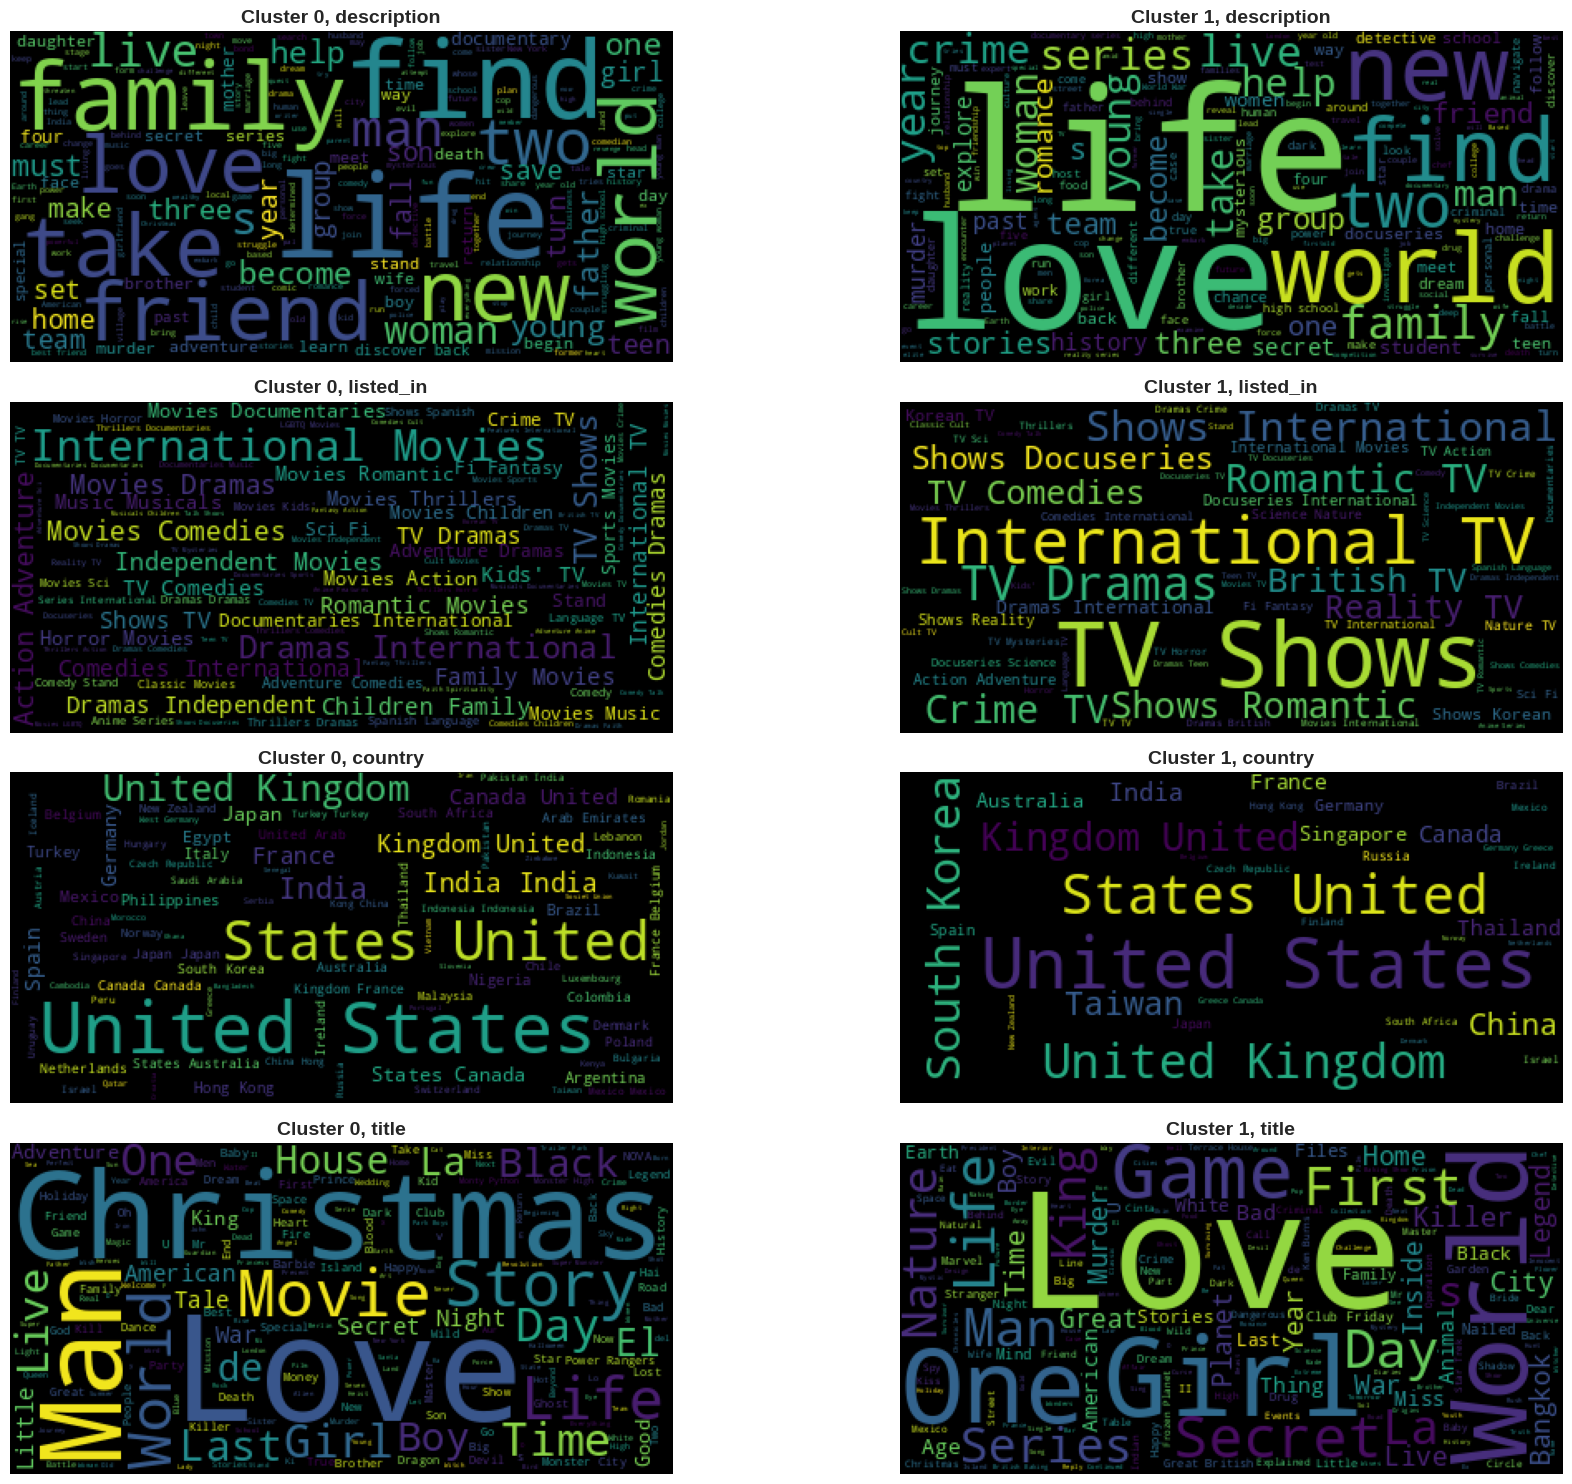

In [101]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

The silhouette score was the best for 15 clusters that is 0.0077226308384750935

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 3

In [106]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(New_df['cluster_data'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=New_df):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Implemented **K-Means Clustering and Agglomerative Hierarchical Clustering**, to cluster the Netflix Movies TV show dataset.
* The optimal number of clusters we are getting from **K-means is 4**, whereas for **Agglomerative Hierarchical Clustering the optimal number of clusters are found out to be 2**.
* We chose **Silhouette Score as the evaluation metric** over distortion score because it provides a more intuitive and interpretable result. Also Silhouette score is less sensitive to the shape of the clusters.
* Built a **Recommendation system** that can help Netflix **improve user experience and reduce subscriber churn** by providing personalized recommendations to users based on their similarity scores.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***